## Fetal Health Classification Using Random Forest
Authors: Jack Yeung & George Mathew

### Overview
This report outlines findings about fetal health classification using a dataset sourced from Kaggle (https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification). Our analysis focuses on identifying key biometric markers that predict fetal health post-birth. The dataset comprises over ~2000 observations, narrowed down through random sampling to meet class constraints for 329E.

The relevant features include several infant cardiac measures and some information regarding the mother's health. The goal of this project is to identify the most important features in predicting fetal health.

Given the initial feature set, we expect severe_decelerations, fetal_movement, and abnormal_short_term_viability to be the three most significant predictors of fetal health. These markers respectively indicate potential issues with blood flow, responsiveness, and cardiovascular regulation, all of which could critically impact fetal viability. As such, we expect them to be strongly negatively correlated with fetal health. 

##### Import Dependencies and Data

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
df = pd.read_csv('fetal_health.csv')

In [7]:
#dataset trimmed to meet class requirement
print(f'Dataset shape before limiting observation size to 2000: {df.shape}')
df = df[:2000]
print(f'Dataset shape after limiting observation size to 2000: {df.shape}')

Dataset shape before limiting observation size to 2000: (2000, 22)
Dataset shape after limiting observation size to 2000: (2000, 22)


In [14]:
#understanding feature columns
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [15]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [7]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


### Data Cleaning and Preprocessing:
Handle Missing Values: Check for missing or zero values that may need to be imputed or handled appropriately.

Data Transformation: Normalize or standardize the continuous features  

Categorical Encoding: If there are any categorical variables not included in the sample provided, they should be encoded properly using one-hot encoding.

In [ ]:
null_counts = df.isnull().sum()
print(f'Number of null values in each column:\n{null_counts}')

Number of null values in each column:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
hi

In [ ]:
#drop hist features since they seem useless
columns_to_drop = [column for column in df.columns if 'histogram' in column.lower()]
cleaned_df = df.drop(columns=columns_to_drop)
cleaned_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


There were no missing or null values to handle (the dataset was likely preprocessed already). Additionally, nearly all the features are numerical so no categorical encoding is necessary.

Let's proceed.

### Exploratory Data Analysis

The 'fetal_health' outcome has three possible labels: it can be tagged as 1 (Normal), 2 (Suspect) or 3 (Pathological).

Statistical Summary: Generate descriptive statistics to understand the distribution of the data.


Visualization: Create visual plots (like histograms, box plots, scatter plots) to see the distribution of features and the relationship between features and the outcome.


Correlation Analysis: Check the correlation between features to identify multicollinearity.

In [ ]:
# Statistical summary
statistical_summary = cleaned_df.describe()
statistical_summary

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,3.000000


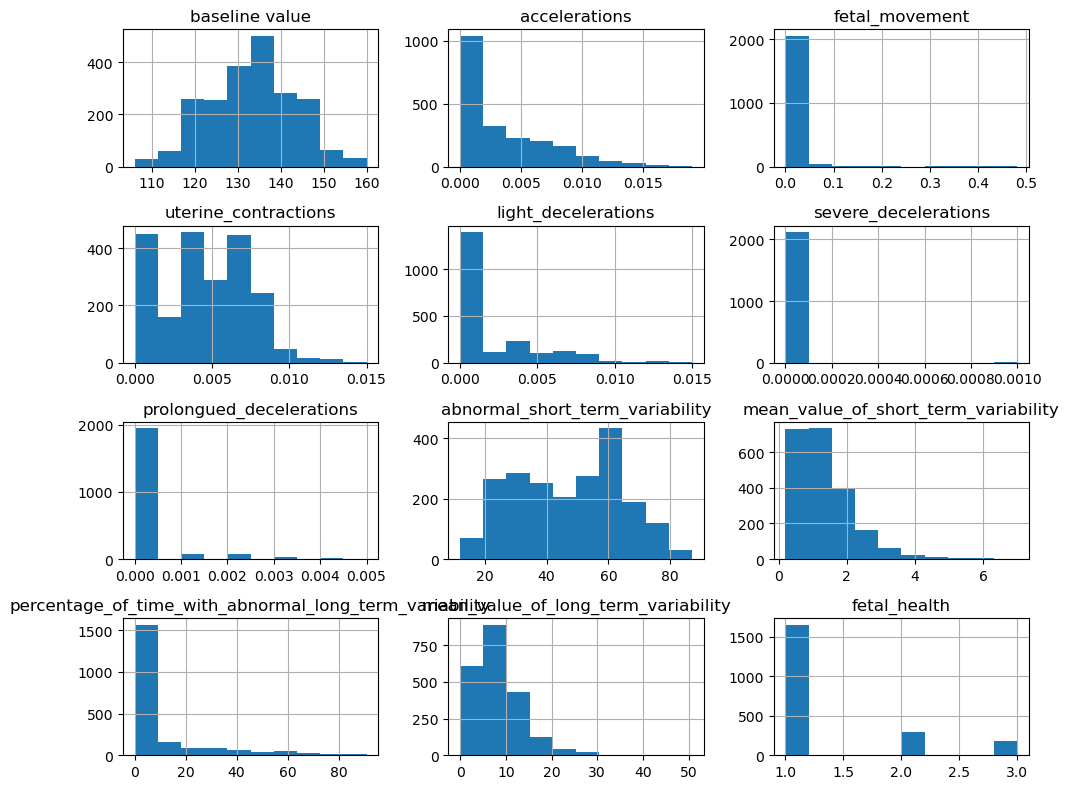

In [ ]:
# Histograms for all features
cleaned_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Something important to note above: looking at the last histogram for fetal health, the dataset is predominantly filled with normal (1) samples. This could skew or affect the other features.

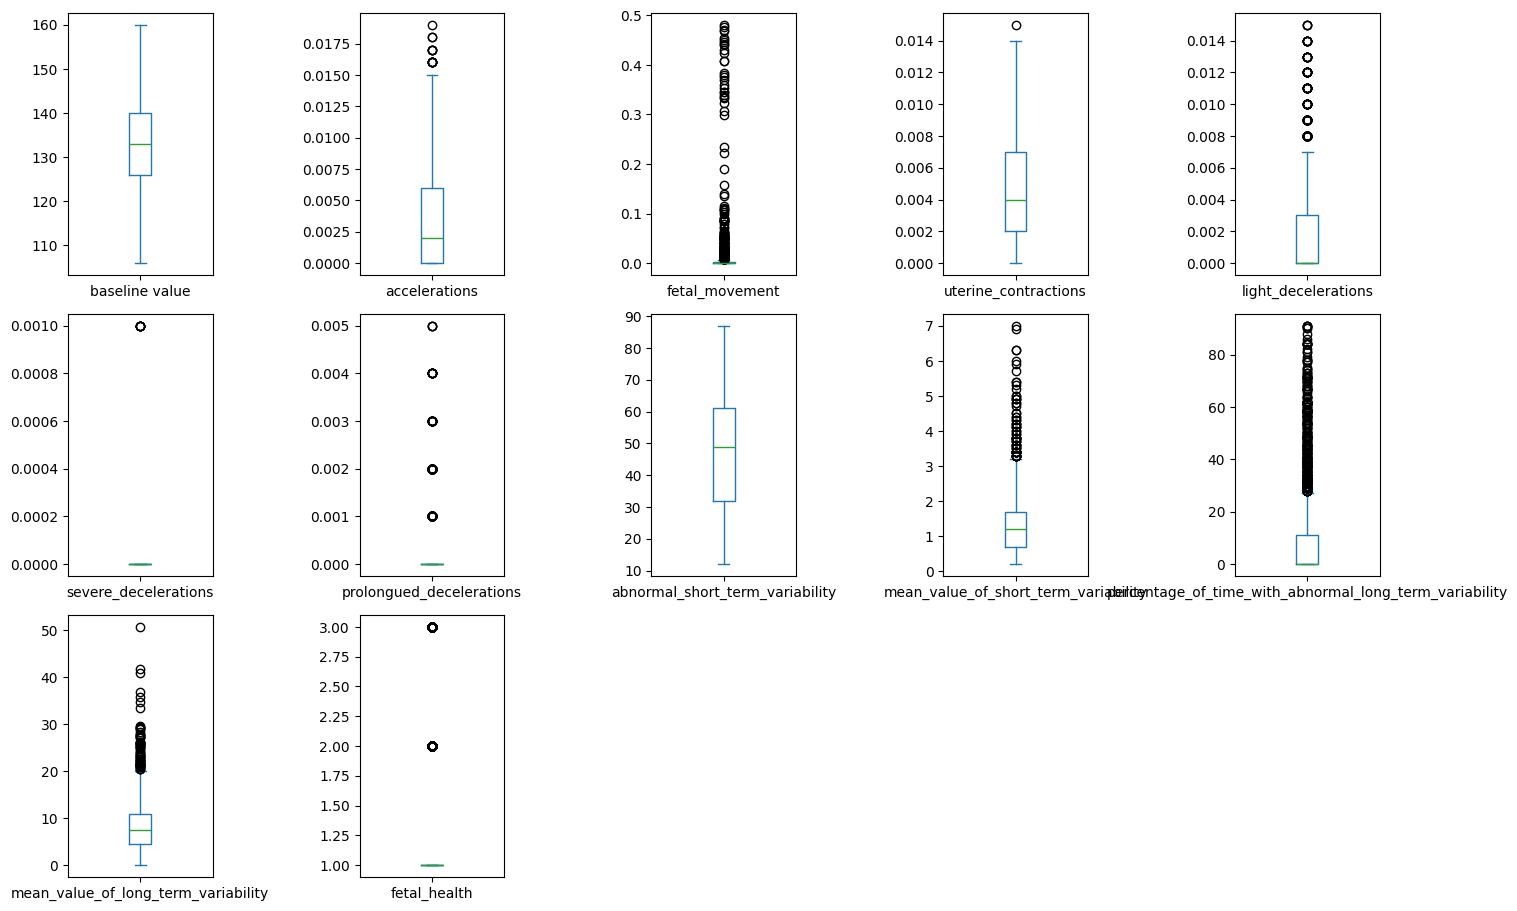

In [ ]:
# Box plots for all features
cleaned_df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15, 15))
plt.tight_layout()
plt.show()

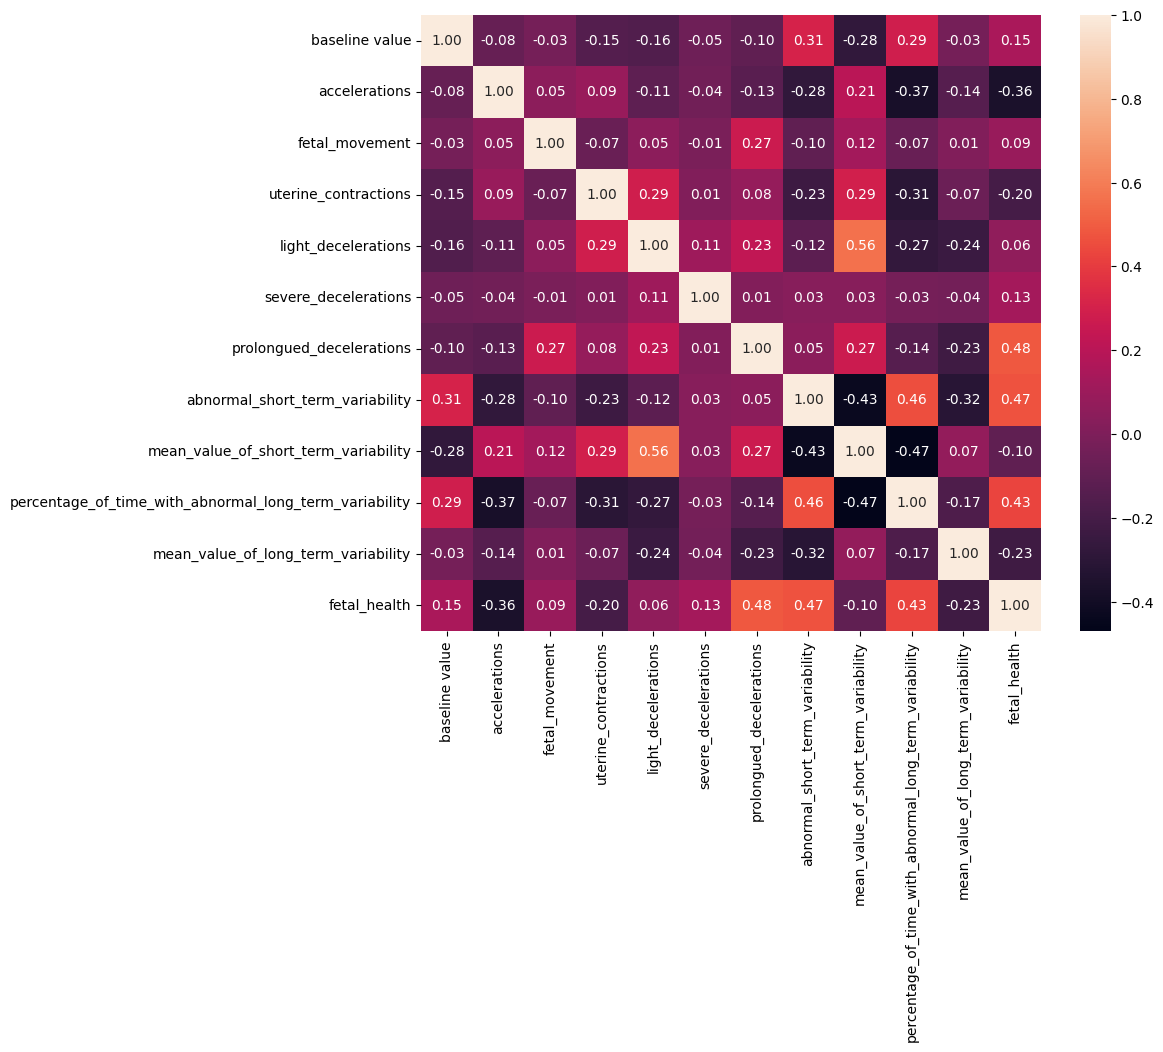

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df.corr(), annot=True, fmt=".2f")
plt.show()

## Model Deployment

The primary objective of this study is to ascertain critical indicators of fetal health status post-delivery by employing multiclass classification methods. A critical part in a classification problem like this is choosing a model that can tell us feature importance.

Random forests are one of the few models that can do this. 

Model Selection: 
Random forests, as an ensemble of decision trees, typically perform better than single decision trees by averaging multiple decision trees' predictions, which reduces variance. Each tree contributes a vote towards the final prediction in a collective decisionmaking process, making the outcome more reliable.

In [ ]:
# Set up the training and test sets
X = cleaned_df.drop('fetal_health', axis=1)  # Features
y = cleaned_df['fetal_health']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

In [ ]:
# Train RF classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train);

Evaluation Metrics: accuracy, precision, recall, F1-score, ROC-AUC curve.

Learning Curves: Plot learning curves to diagnose if the model is learning well or if it's overfitting or underfitting.

In [ ]:
# Test RF classifier
y_pred_rf = rf_classifier.predict(X_test)
y_pred_proba_rf = rf_classifier.predict_proba(X_test)

# Evaluate RF classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf, target_names=['Class 1', 'Class 2', 'Class 3'])

print(f'Accuracy: {accuracy_rf}')
print(f'Classification report: \n{class_report}')

Accuracy: 0.9294670846394985
Classification report: 
              precision    recall  f1-score   support

     Class 1       0.94      0.98      0.96       497
     Class 2       0.84      0.66      0.74        88
     Class 3       0.94      0.89      0.91        53

    accuracy                           0.93       638
   macro avg       0.91      0.84      0.87       638
weighted avg       0.93      0.93      0.93       638



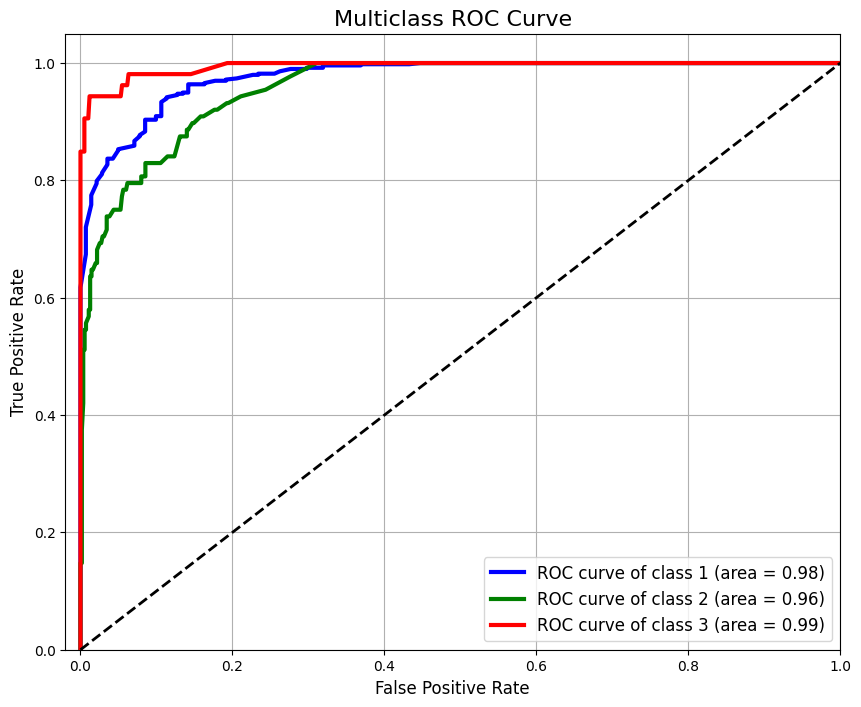

In [ ]:
# ROC CURVE
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = cleaned_df['fetal_health'].nunique()

#calculate false positive and true positive rates
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(10, 8)) 
colors = ['blue', 'green', 'red']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=3, linestyle='-',  
             label=f'ROC curve of class {i+1} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0]) 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multiclass ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True) 
plt.show()

The ROC curve indicates good classification ability - beyond mere chance - across all 3 classes. There are high true positive rates while keeping the false positive rate low, which is close to ideal.

With the model trained, let's answer the original question: What features contributed most to the prediction of fetal health?

In [ ]:
# Get feature importances from the RF model
rf_feature_importances = rf_classifier.feature_importances_
feature_names = X.columns.tolist()
rf_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importances}).sort_values(by='Importance', ascending=False)


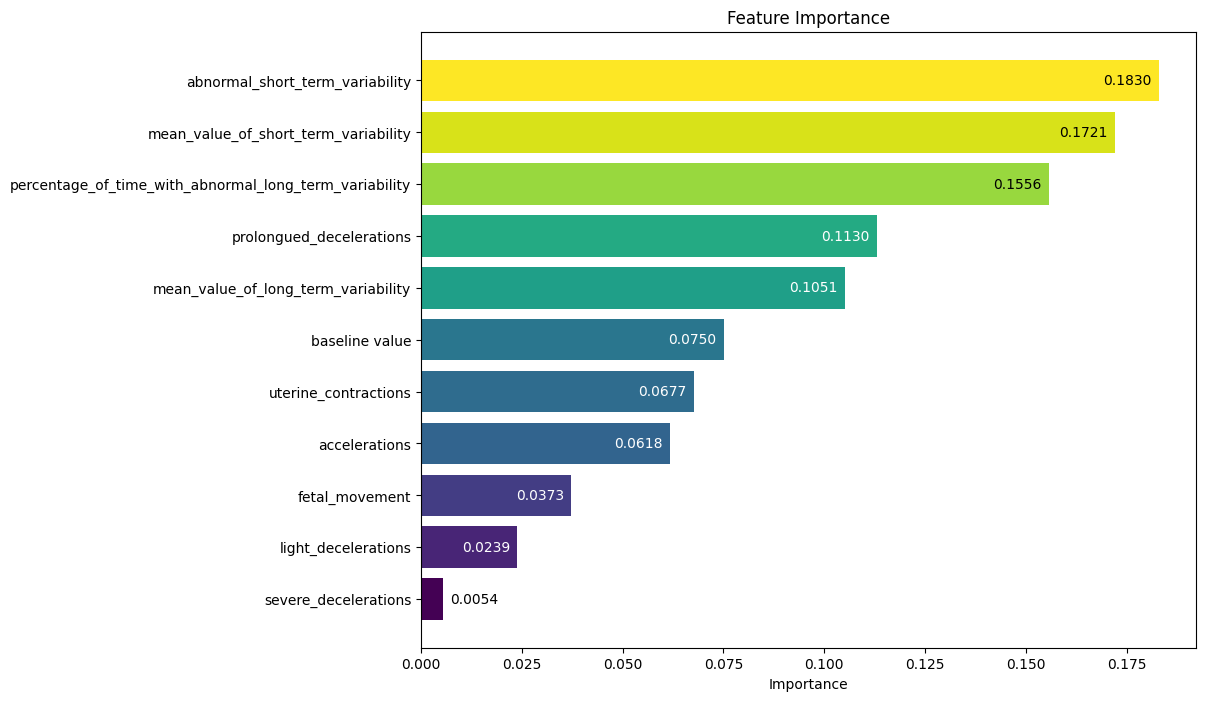

In [ ]:
#VISUALIZATION
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

features = rf_importances_df['Feature']
importances = rf_importances_df['Importance']

# Normalize for color mapping
norm = mcolors.Normalize(vmin=min(importances), vmax=max(importances))
colormap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(10, 8))
colors = colormap(norm(importances))
bars = ax.barh(features, importances, color=colors)

#text color based on bar color (viridis)
def get_text_color(value, cmap, threshold=0.5):
    color = cmap(norm(value)) #RGBA
    luminance = (0.299*color[0] + 0.587*color[1] + 0.114*color[2])
    return 'white' if luminance < threshold else 'black'

# value annotations
for bar, value in zip(bars, importances):
    text_color = get_text_color(value, colormap)
    text_x = bar.get_width()
    if text_x < max(importances) * 0.05:
        #Place text outside the bar
        ax.text(text_x + max(importances) * 0.01, bar.get_y() + bar.get_height()/2, f'{value:.4f}',
                va='center', ha='left', color='black')
    else:
        #Place text inside the bar
        ax.text(text_x - max(importances) * 0.01, bar.get_y() + bar.get_height()/2, f'{value:.4f}',
                va='center', ha='right', color=text_color)

ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
ax.invert_yaxis()

plt.show()


The top three predictors of fetal health are abnormal short term variability, the mean value of short term variability, and the percentage of time with abnormal long term variability. From a biomedical perspective, any abnormality or variability in heart rate could cause significant problems in patients, so the results are not surprising, but interesting nonetheless.

With the most influential biomarkers in predicting post-natal fetal health identified, the final model could be used to make predictions on new patient data.